### Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

In [3]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 584.0+ bytes


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [20]:
# your answer here-1st way
employee.pivot_table(index=['Department'], aggfunc=np.mean)['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [5]:
# your answer here-2nd way
employee.groupby('Department').mean()['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [24]:
# your answer here
employee.pivot_table(index= ('Department', 'Title'))[['Salary']]

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [36]:
# your answer here
employee.pivot_table(values=['Salary', 'Years'], index = ('Title'))

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [59]:
# your answer here
employee.pivot_table(index=('Department', 'Title'), values = ['Salary'], aggfunc= {'Salary':[np.mean, lambda x: len(x.unique())]})


Salary      
                     <lambda>  mean
Department Title                   
HR         VP             1.0  70.0
           analyst        2.0  32.5
IT         VP             1.0  70.0
           analyst        2.0  32.5
           associate      1.0  60.0
Sales      associate      1.0  55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [60]:
# your answer here
employee.pivot_table(index = ('Department', 'Title'), values= ['Salary'], aggfunc={np.median, np.min, np.max, np.std})

Salary                       
                       amax  amin median       std
Department Title                                  
HR         VP          70.0  70.0   70.0       NaN
           analyst     35.0  30.0   32.5  3.535534
IT         VP          70.0  70.0   70.0       NaN
           analyst     35.0  30.0   32.5  3.535534
           associate   60.0  60.0   60.0       NaN
Sales      associate   55.0  55.0   55.0  0.000000

Where's only one value, the std is not calculated. Where's two repeated values, the std turns out to be 0. 
If the salary are net and in €, I want to work in this company. 

#### Based on your comments, fill the missing values with an appropriate value

I think that the result is correct. But because I want to practice changing values, I'll change the NaN to 0. 

In [62]:
employee.pivot_table(index = ('Department', 'Title'), values= ['Salary'], aggfunc={np.median, np.min, np.max, np.std}).fillna(0)

Salary                       
                       amax  amin median       std
Department Title                                  
HR         VP          70.0  70.0   70.0  0.000000
           analyst     35.0  30.0   32.5  3.535534
IT         VP          70.0  70.0   70.0  0.000000
           analyst     35.0  30.0   32.5  3.535534
           associate   60.0  60.0   60.0  0.000000
Sales      associate   55.0  55.0   55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [64]:
# your answer here
employee.pivot_table(index=('Department'), values=['Salary'], aggfunc={np.sum, lambda x: len(x.unique()) })

Salary     
           <lambda>  sum
Department              
HR                3  135
IT                4  195
Sales             1  110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [65]:
# your answer here
employee.pivot_table(index= ('Department', 'Title'), values=['Salary', 'Years'], aggfunc= {'Salary' : np.mean, 'Years':np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [66]:
# your answer here--Your custom function here
def new_salary_mean(x):
    ....
        

In [68]:
# your answer here
employee.pivot_table(index= ('Department', 'Title'), values=['Salary', 'Years'], aggfunc= {'Salary' : new_salary_mean, 'Years':np.sum})

Salary  Years
Department Title                     
HR         VP               72      8
           analyst    [32, 37]      6
IT         VP               72      8
           analyst    [37, 32]      3
           associate        62      7
Sales      associate  [57, 57]      5

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [69]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [70]:
# your answer here
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [71]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.2+ KB


In [72]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [76]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Very Active'])

0.5714518481062608

In [77]:
fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [80]:
# your answer here
import matplotlib.pyplot as plt

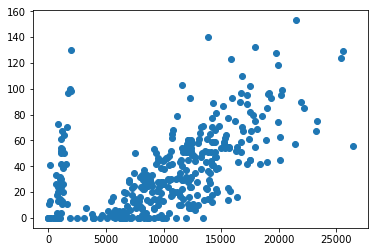

In [81]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])

#### What can you say about Minute Very Active and Steps? Write a comment below

There's a correlation between both variables. However, there's also a group of values that represent activities with very minutes actives but with very low increment in steps. That is, not all very active minutes have to include steps. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [83]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

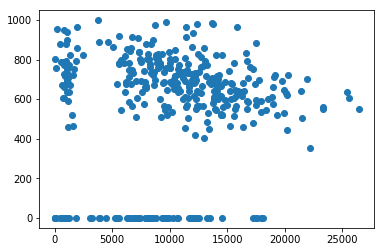

In [84]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])

These two variables don't correlate at all. Increase the steps don't affect the minutes sedentary.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [85]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

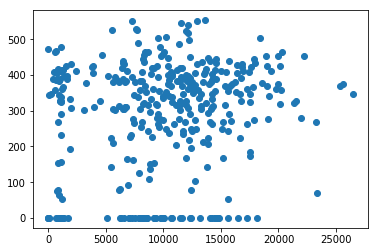

In [87]:
# your answer here
plt.scatter(y = fitbit['MinutesOfSleep'], x = fitbit['Steps'])

In [ ]:
These two variables don't correlate at all. Increase the steps don't affect the minutes of sleep.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [88]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
subfitbit = fitbit[column]

In [95]:
cor_fit = subfitbit.corr()

In [96]:
#Print cor_fit
print(cor_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [100]:
# your answer here
cor_fit.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


Only Minutes very Active correlate somehow.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [101]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [102]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

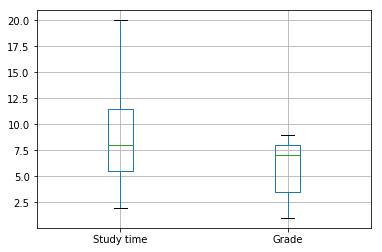

In [103]:
# your answer here
time_grades.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf096975f8>,
      dtype=object)

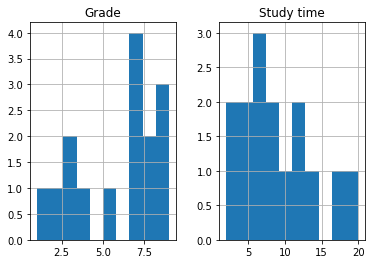

In [105]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [106]:
# your answer here-Pearson 
time_grades.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [108]:
## your answer here-Spearman
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
both have similar values.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

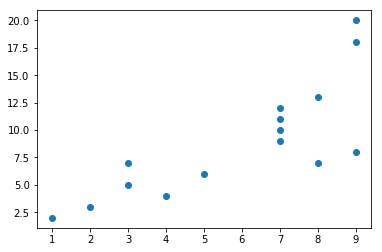

In [109]:
# your answer here
plt.scatter(x=time_grades['Grade'], y=time_grades['Study time'])

In [34]:
#your comment here
In a general way, the better grade you get, the more time you had studied.

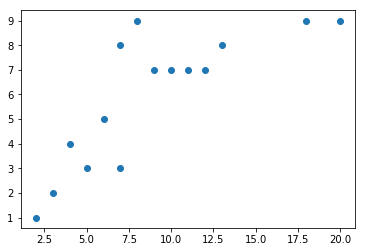

In [110]:
plt.scatter(y=time_grades['Grade'], x=time_grades['Study time'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 


Spearman is computed on ranks and so depicts monotonic relationships while Pearson is computed on true values and depicts linear relationships.